# Lab 07 - Data Preprocessing II

Name: Dylan Zucker 

Class: CSCI 349 - Intro to Data Mining

Semester: 2019SP

Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Create a Python function called process_FAA_hourly_data that takes a filename as a string, and returns a completely processed pandas data frame, ready for analysis. It should do everything that the previous lab did to clean the file, including converting all numeric variables to their simplest numeric types, and converting the date/time stamp (first variable) to a pandas DatestampIndex, which becomes the actual index for the data frame. It should drop the date time variable after moving it to become the index.
### You completed this functionality in the last lab. (The last lab also had you create a new categorical variable called "Quarter". Do not include that functionality in this function.) Just copy over those important statements for processing FAA hourly files to cleaned data frames.

In [2]:
def process_FAA_hourly_data(filename):
    # Read in file and get rid of bad rows at beginning and bad col
    df_temps = pd.read_csv(filename, skiprows=16)
    del df_temps["Unnamed: 13"]
    # Drop header rows
    df_temps.set_index(["Date/Time (GMT)"], inplace = True)
    df_temps = df_temps.drop("Date/Time (GMT)")
    df_temps.reset_index(level=0, inplace=True)
    # Get correct data types and index
    cols = df_temps.columns.drop("Date/Time (GMT)")
    df_temps[cols] = df_temps[cols].apply(pd.to_numeric, errors="coerce", downcast="float")
    df_temps.set_index(pd.to_datetime(df_temps["Date/Time (GMT)"]), inplace=True)
    df_temps = df_temps.drop(["Date/Time (GMT)"], axis = 1)

    return df_temps

### 2. Use your new function to read in the KIPT data file you downloaded in the last lab. Output the results of info() and describe() to confirm you read it in correctly.

In [3]:
df_kipt = process_FAA_hourly_data("../data/faa_hourly-KIPT_20180101-20181231.csv")
print(df_kipt.info())
df_kipt.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8693 entries, 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 12 columns):
Number of Observations (n/a)     8693 non-null float32
Average Temp (F)                 8687 non-null float32
Max Temp (F)                     8687 non-null float32
Min Temp (F)                     8687 non-null float32
Average Dewpoint Temp (F)        8687 non-null float32
1 Hour Precip (in)               1730 non-null float32
Max Wind Gust (mph)              1044 non-null float32
Average Relative Humidity (%)    8425 non-null float32
Average Wind Speed (mph)         8680 non-null float32
Average Station Pressure (mb)    8675 non-null float32
Average Wind Direction (deg)     8279 non-null float32
Max Wind Speed (mph)             8680 non-null float32
dtypes: float32(12)
memory usage: 475.4 KB
None


,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,8693.000000,8687.000000,8687.000000,8687.000000,8687.000000,1730.000000,1044.000000,8425.000000,8680.000000,8675.000000,8279.000000,8680.000000
mean,1.399747,51.752949,51.847424,51.662979,41.679466,0.040006,23.856607,71.532341,6.033934,1017.903870,153.428223,6.325322
std,0.903277,19.336647,19.362600,19.315979,20.122789,0.088109,5.003497,19.806866,5.022862,7.417217,123.154831,5.109224
min,1.000000,-2.900000,-2.900000,-2.900000,-11.000000,0.000000,16.100000,9.000000,0.000000,986.000000,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,25.000000,0.000000,20.700001,57.000000,1.750000,1013.200012,2.085000,3.500000
50%,1.000000,51.099998,51.099998,50.000000,42.099998,0.010000,23.000000,75.000000,5.800000,1017.900024,133.330002,5.800000
75%,1.000000,69.099998,69.099998,69.099998,60.099998,0.040000,26.500000,89.000000,9.200000,1022.400024,270.000000,9.200000
max,8.000000,96.099998,96.099998,96.099998,76.449997,1.480000,54.099998,100.000000,35.700001,1043.699951,360.000000,36.799999


### 3. Read in the file FAA_PA_stations.csv provided on Moodle. It's not actually a comma separated file, but a tab separated file. Store the data frame as stations.

In [4]:
stations = pd.read_csv("../data/FAA_PA_stations.csv", delimiter="\t")

### 4. Examine the data frame (show the first few records). In particular, pay close attention to the variables Lat and Lon. These represent the precise latitude and longitude geolocation for the weather station. Then, create a new variable in stations that stores the distance of every station in PA to Williamsport KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the distance between the stations. As a reminder, Euclidean distance between two points defined by (x1, y1) and (x2, y2) is:

$$dist = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

In [5]:
def find_euc_dist(df, x):
    w = df[df["ID"] == "KIPT"]
    return np.sqrt(((w["Lat"] - x["Lat"]) ** 2) + ((w["Lon"] - x["Lon"])** 2))

print(stations.info())
print(stations.head(3))
stations["distance"] = stations.apply(lambda x: find_euc_dist(stations, x), axis=1)

stations.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
ID                  46 non-null object
Name                46 non-null object
County              45 non-null object
State               46 non-null object
Lat                 46 non-null float64
Lon                 46 non-null float64
Elevation (feet)    46 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB
None
     ID          Name  County State    Lat    Lon  Elevation (feet)
0  KABE     ALLENTOWN  LEHIGH    PA  40.65 -75.44             376.0
1  KAOO       ALTOONA   BLAIR    PA  40.29 -78.32            1504.0
2  KBVI  BEAVER FALLS  BEAVER    PA  40.77 -80.39            1230.0


,ID,Name,County,State,Lat,Lon,Elevation (feet),distance
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0,1.593267
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0,1.691892
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0,3.501685


### 5. Output the top 5 stations that are closest to KIPT. (The closest one should be to itself!) The stations should be listed in order of increasing distance from KIPT.

In [6]:
stations.sort_values(by=["distance"]).head(5)

,ID,Name,County,State,Lat,Lon,Elevation (feet),distance
30,KIPT,WILLIAMSPORT,LYCOMING,PA,41.24,-76.92,520.0,0.000000
27,KSEG,SELINSGROVE,SNYDER,PA,40.82,-76.86,444.0,0.424264
18,KMUI,MUIR ARMY AIR FIELD,LEBANON,PA,40.43,-76.57,489.0,0.882383
28,KUNV,UNIVERSITY PARK,CENTRE,PA,40.85,-77.85,1240.0,1.008464
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0,1.022399


### 6. Using your results, go back to the PSU climate website, and download the faa_hourly data for the same date ranges for the three closest stations to KIPT. Copy them into your data folder. Then, read in each data file into its own data frame using your function. You should have four data frames: df_kipt, and three other data frames representing the three closest stations.

In [7]:
df_kseg = process_FAA_hourly_data("../data/faa_hourly-KSEG_20180101-20181231.csv")
df_kmui = process_FAA_hourly_data("../data/faa_hourly-KMUI_20180101-20181231.csv")
df_kunv = process_FAA_hourly_data("../data/faa_hourly-KUNV_20180101-20181231.csv")

### 7. Create a function called get_missing_timestamps that takes a data frame of FAA hourly data, and returns a simple Python list of Timestamp objects representing all of the dates that are missing. The design of the function is up to you. However, a forward thinking data scientist will make these functions as flexible as possible. (AND, a good software developer will NOT hardcode values for specific cases!)

In [8]:
def get_missing_timestamps(df_temps):
    s = "2018-01-01 00:00am"
    e = "2018-12-31 11:00pm"
    dr2 = pd.date_range(s, e, freq="h")
    missing = dr2[~dr2.isin(df_temps.index)]
    return missing
    

### 8. Write the Python code that reports a list of timestamps that are included in each nearby station that KIPT is missing. (HINT: it will be far, far easier if you consider casting your list to a set, and using set methods.)

In [9]:
missing_kipt = set(get_missing_timestamps(df_kipt))
missing_kseg = set(get_missing_timestamps(df_kseg))
missing_kmui = set(get_missing_timestamps(df_kmui))
missing_kunv = set(get_missing_timestamps(df_kunv))
missing_close = missing_kseg | missing_kmui | missing_kunv

missing_found_in_close_stats = missing_kipt - missing_close
missing_found_in_close_stats

{Timestamp('2018-03-02 19:00:00'), Timestamp('2018-09-02 22:00:00')}

### 9. Since we're going to focus on average temperature, create a new data frame called df_ave_temps that contains a the average temperature from all four stations. It should have a COMPLETE hourly date range for its index from the specified start date to finish date (i.e. you should have 365 * 24 rows.) If the dates are missing from the station you are copying from, then plug in a NaN value for that entry. Label your variables accordingly. You will use these data for the remainder of this work.

In [10]:
dfs = [df_kipt, df_kseg, df_kmui, df_kunv]
for x in dfs:
    missing_ave_temps = get_missing_timestamps(x)
    for y in missing_ave_temps:
        x.loc[y] = np.nan

df_ave_temps = pd.concat((df_kipt['Average Temp (F)'], df_kmui['Average Temp (F)'], df_kseg['Average Temp (F)'], df_kunv['Average Temp (F)']), axis=1)
df_ave_temps.columns = ["KIPT", "KSEG", "KMUI", "KUNV"]
df_ave_temps.sort_index(inplace=True)
df_ave_temps.shape

(8760, 4)

### 10. Report the dates that have missing data for all four stations, if any.

In [11]:
df_ave_temps.loc[(df_ave_temps["KIPT"].isna()) & (df_ave_temps["KMUI"].isna()) & (df_ave_temps["KSEG"].isna()) & (df_ave_temps["KUNV"].isna())]

,KIPT,KSEG,KMUI,KUNV
Date/Time (GMT),,,,
2018-01-04 02:00:00,NaN,NaN,NaN,NaN
2018-01-04 03:00:00,NaN,NaN,NaN,NaN
2018-01-04 04:00:00,NaN,NaN,NaN,NaN
2018-01-04 05:00:00,NaN,NaN,NaN,NaN
2018-01-04 09:00:00,NaN,NaN,NaN,NaN
2018-01-04 11:00:00,NaN,NaN,NaN,NaN
2018-01-04 12:00:00,NaN,NaN,NaN,NaN
2018-03-26 07:00:00,NaN,NaN,NaN,NaN
2018-07-31 21:00:00,NaN,NaN,NaN,NaN


### 11. Start by creating three separate scatter plots showing the average temperature over time for Williamsport and each of the three closest stations you downloaded. Plot KIPT with the same color for each plot, but use a different color for each of the close stations. Be sure to label your plots accordingly.

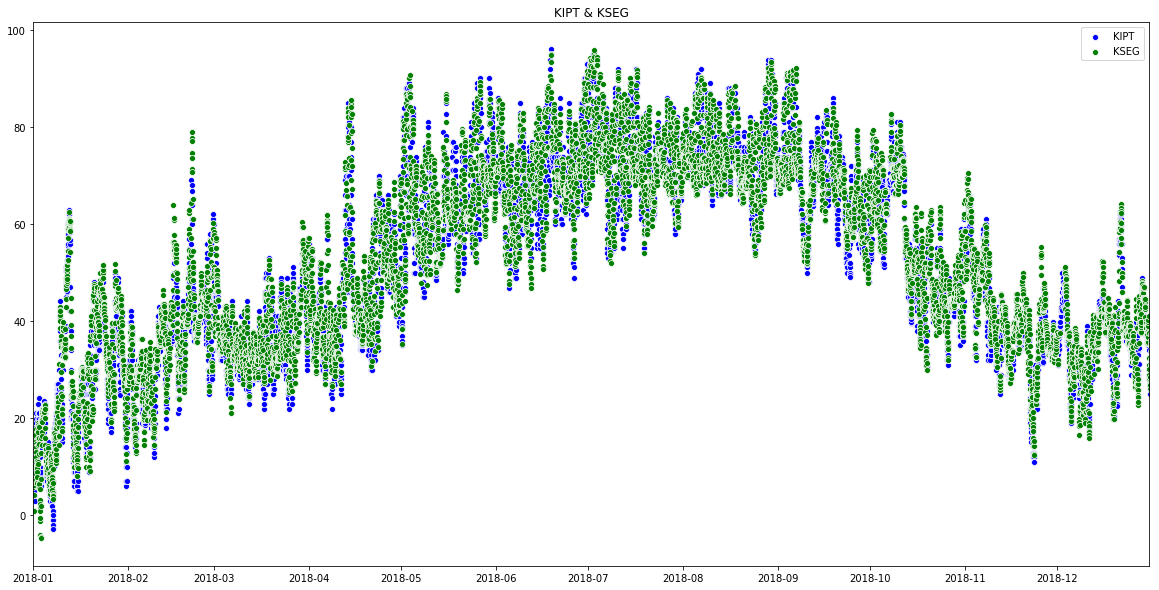

In [27]:
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(color="b", data=df_ave_temps["KIPT"], label="KIPT")
ax2 = sns.scatterplot(color="g", data=df_ave_temps["KSEG"], ax=ax1, label="KSEG")
plt.title("KIPT & KSEG")
ax1.set_xlim([pd.Timestamp(2018, 1, 1), pd.Timestamp(2018, 12, 31)])
plt.show()

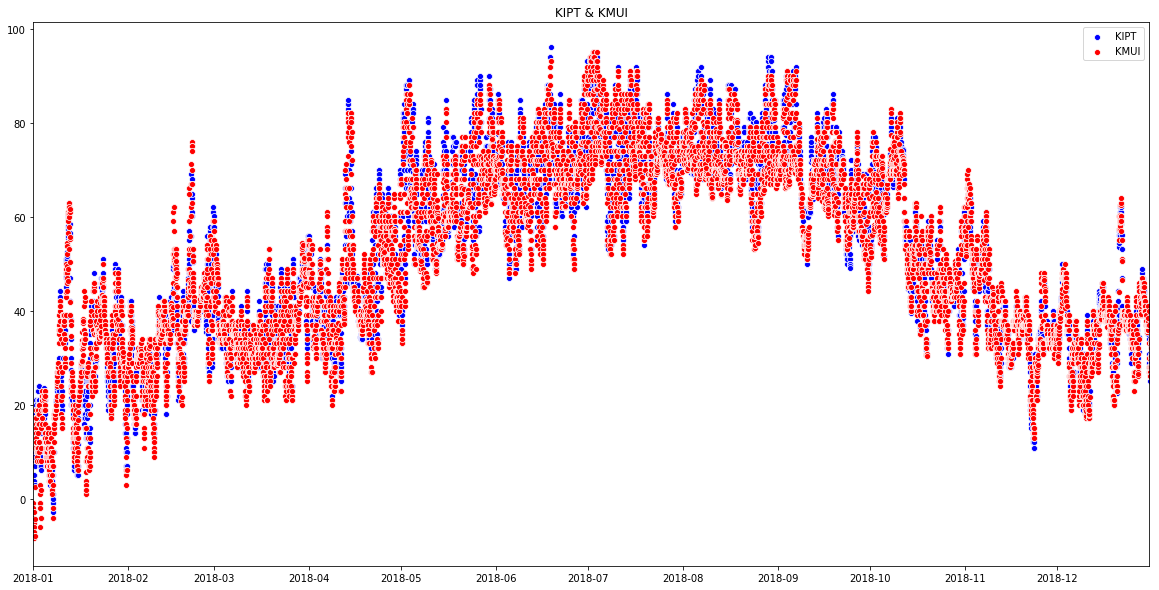

In [25]:
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(color="b", data=df_ave_temps["KIPT"], label="KIPT")
ax2 = sns.scatterplot(color="r", data=df_ave_temps["KMUI"], ax=ax1, label="KMUI")
plt.title("KIPT & KMUI")
ax1.set_xlim([pd.Timestamp(2018, 1, 1), pd.Timestamp(2018, 12, 31)])
plt.show()

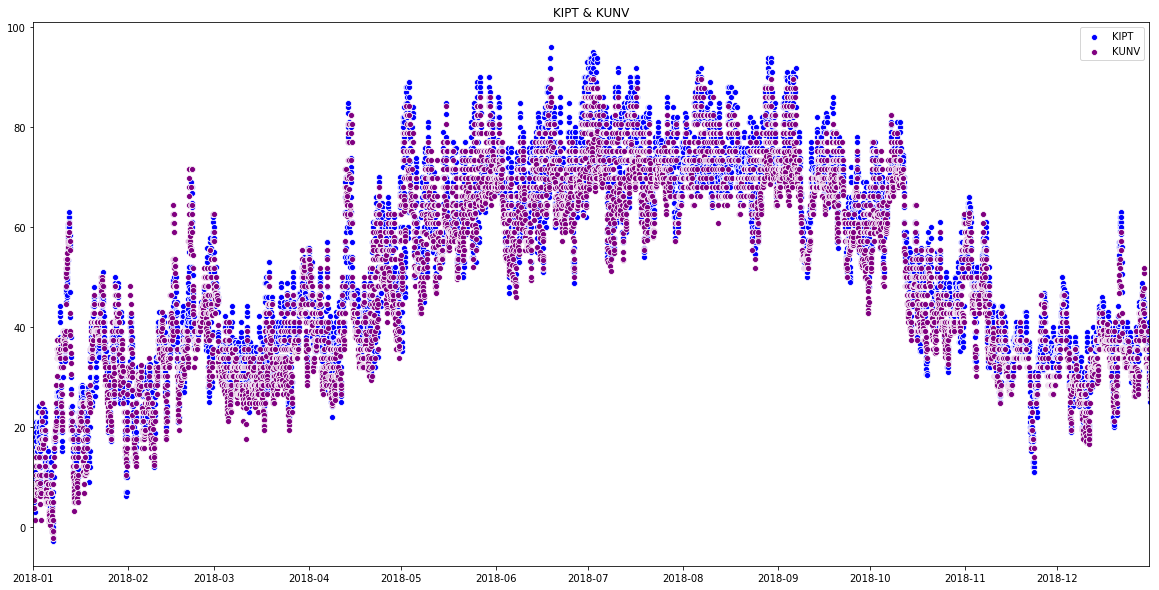

In [26]:
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(color="b", data=df_ave_temps["KIPT"], label="KIPT")
ax2 = sns.scatterplot(color="purple", data=df_ave_temps["KUNV"], ax=ax1, label="KUNV")
ax1.set_xlim([pd.Timestamp(2018, 1, 1), pd.Timestamp(2018, 12, 31)])
plt.title("KIPT & KUNV")
plt.show()

### 12. The lines will largely overlap, as one would expect. Select one month of your choosing, and repeat the previous step for that month.

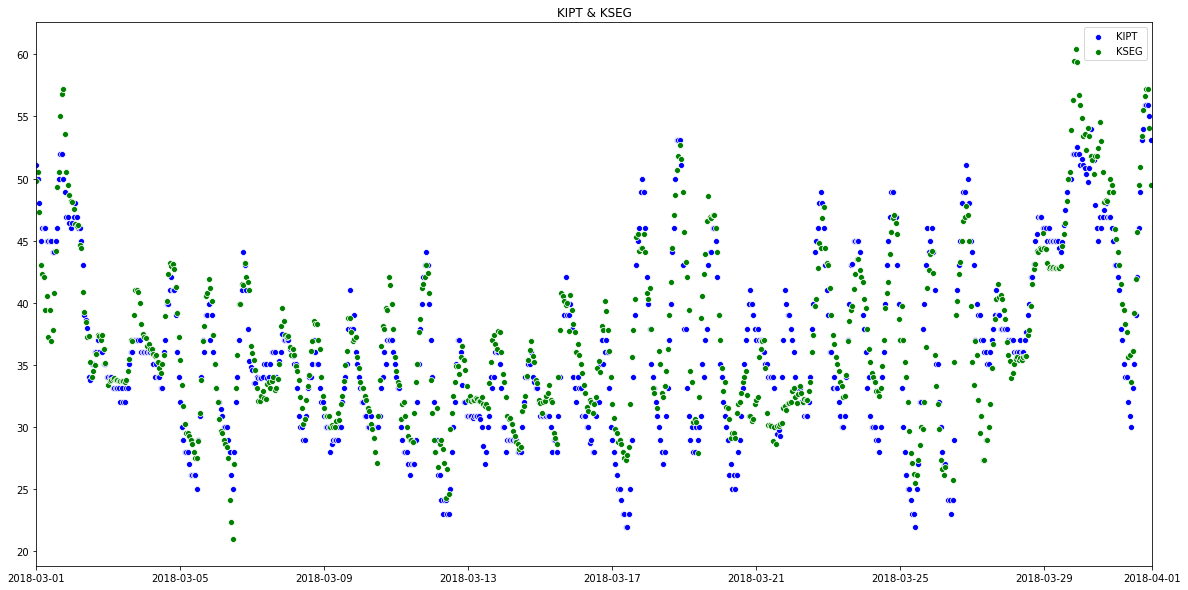

In [30]:
# Plotting march
df_ave_temps_march = df_ave_temps[df_ave_temps.index.month==3]

# Plotting KIPT VS KSEG
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(color="b", data=df_ave_temps_march["KIPT"], label="KIPT")
ax2 = sns.scatterplot(color="g", data=df_ave_temps_march["KSEG"], ax=ax1, label="KSEG")
plt.title("KIPT & KSEG")
ax1.set_xlim([pd.Timestamp(2018, 3, 1), pd.Timestamp(2018, 4, 1)])
plt.show()


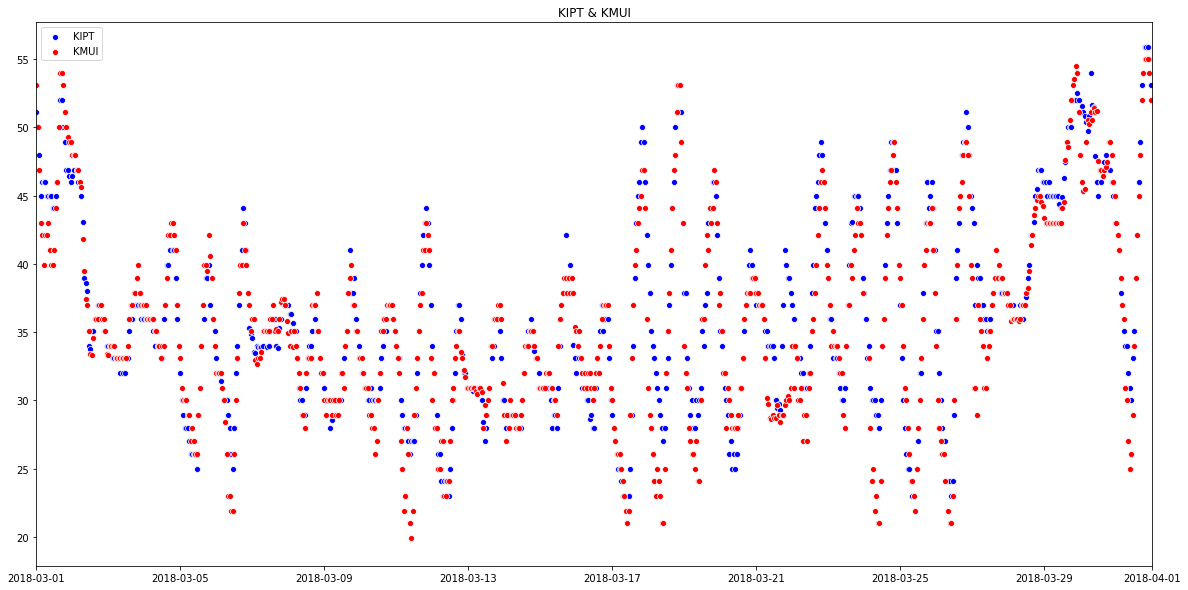

In [28]:
# Plotting KIPT VS KMUI
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(color="b", data=df_ave_temps_march["KIPT"], label="KIPT")
ax2 = sns.scatterplot(color="r", data=df_ave_temps_march["KMUI"], ax=ax1, label="KMUI")
plt.title("KIPT & KMUI")
ax1.set_xlim([pd.Timestamp(2018, 3, 1), pd.Timestamp(2018, 4, 1)])
plt.show()

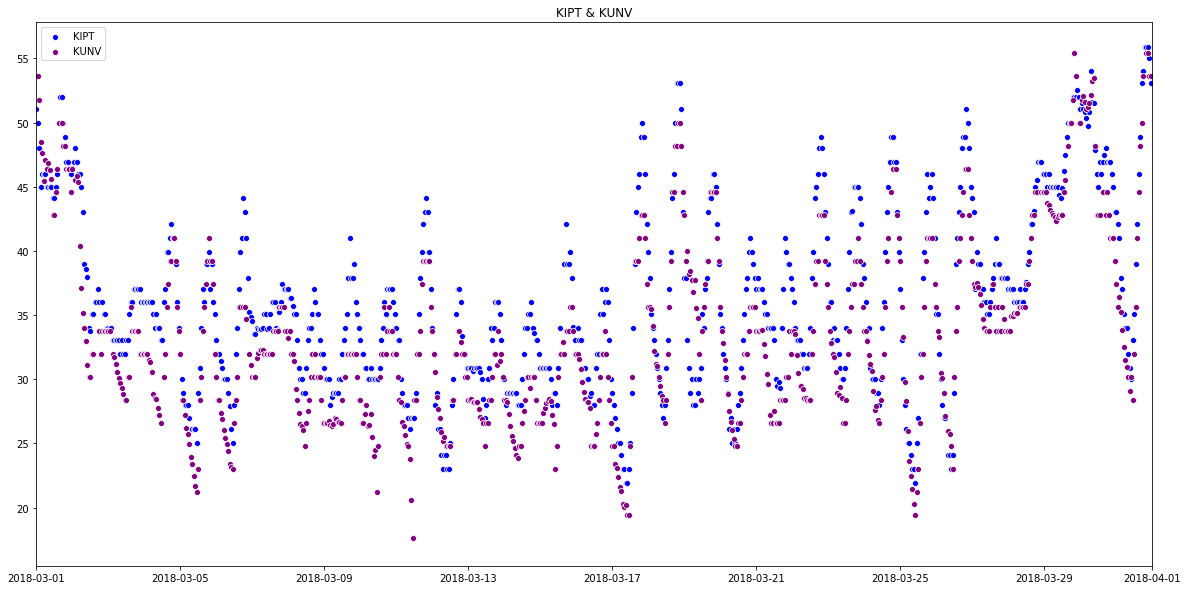

In [29]:
# Plotting KIPT vs KUNV
fig = plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot(color="b", data=df_ave_temps_march["KIPT"], label="KIPT")
ax2 = sns.scatterplot(color="purple", data=df_ave_temps_march["KUNV"], ax=ax1, label="KUNV")
plt.title("KIPT & KUNV")
ax1.set_xlim([pd.Timestamp(2018, 3, 1), pd.Timestamp(2018, 4, 1)])
plt.show()

### 13. Report the number of NaN values that are shared between KIPT and each station you downloaded for average temperature. Remember, be careful how you compare values. Dates will not be in the same row index due to missing data (i.e. do not just iterate over rows using integers!) Write the code to generate the answer. Because you are focused on cleaning up average temperature, this could help you decide which station to use.

In [14]:
shared_kseg = missing_kipt.intersection(missing_kseg)
shared_kmui = missing_kipt.intersection(missing_kmui) 
shared_kunv = missing_kipt.intersection(missing_kunv)
print("KSEG: ", len(shared_kseg))
print("KMUI: ", len(shared_kmui))
print("KUNV: ", len(shared_kunv))


KSEG:  64
KMUI:  47
KUNV:  48


### 14. Perhaps it's more important to select the station that has the most similar values. Write a function called compare_station that takes two Series objects, and computes the sum of the absolute value of the difference between each number in the vector. You should only sum the values that have valid values for both entries. Return the average of these absolute differences. Then, call compare_station on KIPT and each of the new station, but pass only the average temp vector from each station.

In [15]:
def compare_station(s1, s2):
    df = pd.concat([s1, s2], axis = 1)
    df.columns = ["x", 'y']
    diffs = df.apply(lambda x: abs(x["x"] - x['y']) if not np.isnan(x['x']) and not np.isnan(x["y"]) else np.nan, axis=1)
    return diffs.mean()

diff_kseg = compare_station(df_ave_temps["KIPT"], df_ave_temps["KSEG"])
diff_kmui = compare_station(df_ave_temps["KIPT"], df_ave_temps["KMUI"])
diff_kunv = compare_station(df_ave_temps["KIPT"], df_ave_temps["KUNV"])
print("KSEG: ", diff_kseg)
print("KMUI: ", diff_kmui)
print("KUNV: ", diff_kunv)

KSEG:  2.7543632048959488
KMUI:  1.8825645354992955
KUNV:  2.984193933200105


### 15. As we learned in class, you could compute a correlation coefficient between columns of data to determine similarity. Compute the correlation coefficient between the average temp of KIPT, and each of the other stations you downloaded. They should all be very close to 1, but not quite. What does this technique suggest which station is most similar?

It is most similar to KMUI. (Not counting itself)

In [16]:
df_ave_temps.corr()["KIPT"]

KIPT    1.000000
KSEG    0.982717
KMUI    0.989221
KUNV    0.983036
Name: KIPT, dtype: float64

### 16. Important question: Which station seems to be the best representative for KIPT? Why?

KMUI. It has the least number of NAN's in common, has the lowest average difference in average temperature per day, it also has the highest coorelation coeficient.

### 17. Create a new attribute called aveTempFixed in your KIPT data frame that keeps all of the original average temp data, but takes the readings from the station that is the best representitive for KIPT to replace in the NA values.

In [17]:
# The closest is KMUI
print("Before: #NANs = ", df_kipt["Average Temp (F)"].isna().sum())
df_kipt["aveTempFixed"] = df_kipt["Average Temp (F)"].fillna(df_kmui["Average Temp (F)"])
print("After: #NANs = ", df_kipt["aveTempFixed"].isna().sum())

Before: #NANs =  73
After: #NANs =  47


### 18. How many missing values did you fill in?

In [18]:
df_kipt["Average Temp (F)"].isna().sum() - df_kipt["aveTempFixed"].isna().sum()

26

### 19. Create a new function called moving_ave that takes a Series of numbers and a window size, and returns a new vector that contains the moving average over the window size. For example:
`moving_ave(pd.Series([5,10,3,7,8,9]),3)
NA, 6, 6.666667, 6, 8, NA`

NOTE: Your function should center your data over the range, and fill the ends with NA values.

In [19]:
def moving_ave(ser, window_size):
    return ser.rolling(window_size, center=True).mean()
moving_ave(pd.Series([5,10,3,7,8,9]), 3)

0         NaN
1    6.000000
2    6.666667
3    6.000000
4    8.000000
5         NaN
dtype: float64

### 20. Use your new function to smooth out your fixed average temp data. Call moving_ave with a moving average window size of 6, 12, and 24. Show the raw data and your three smoothed plots on one single plot. Interpret your results.

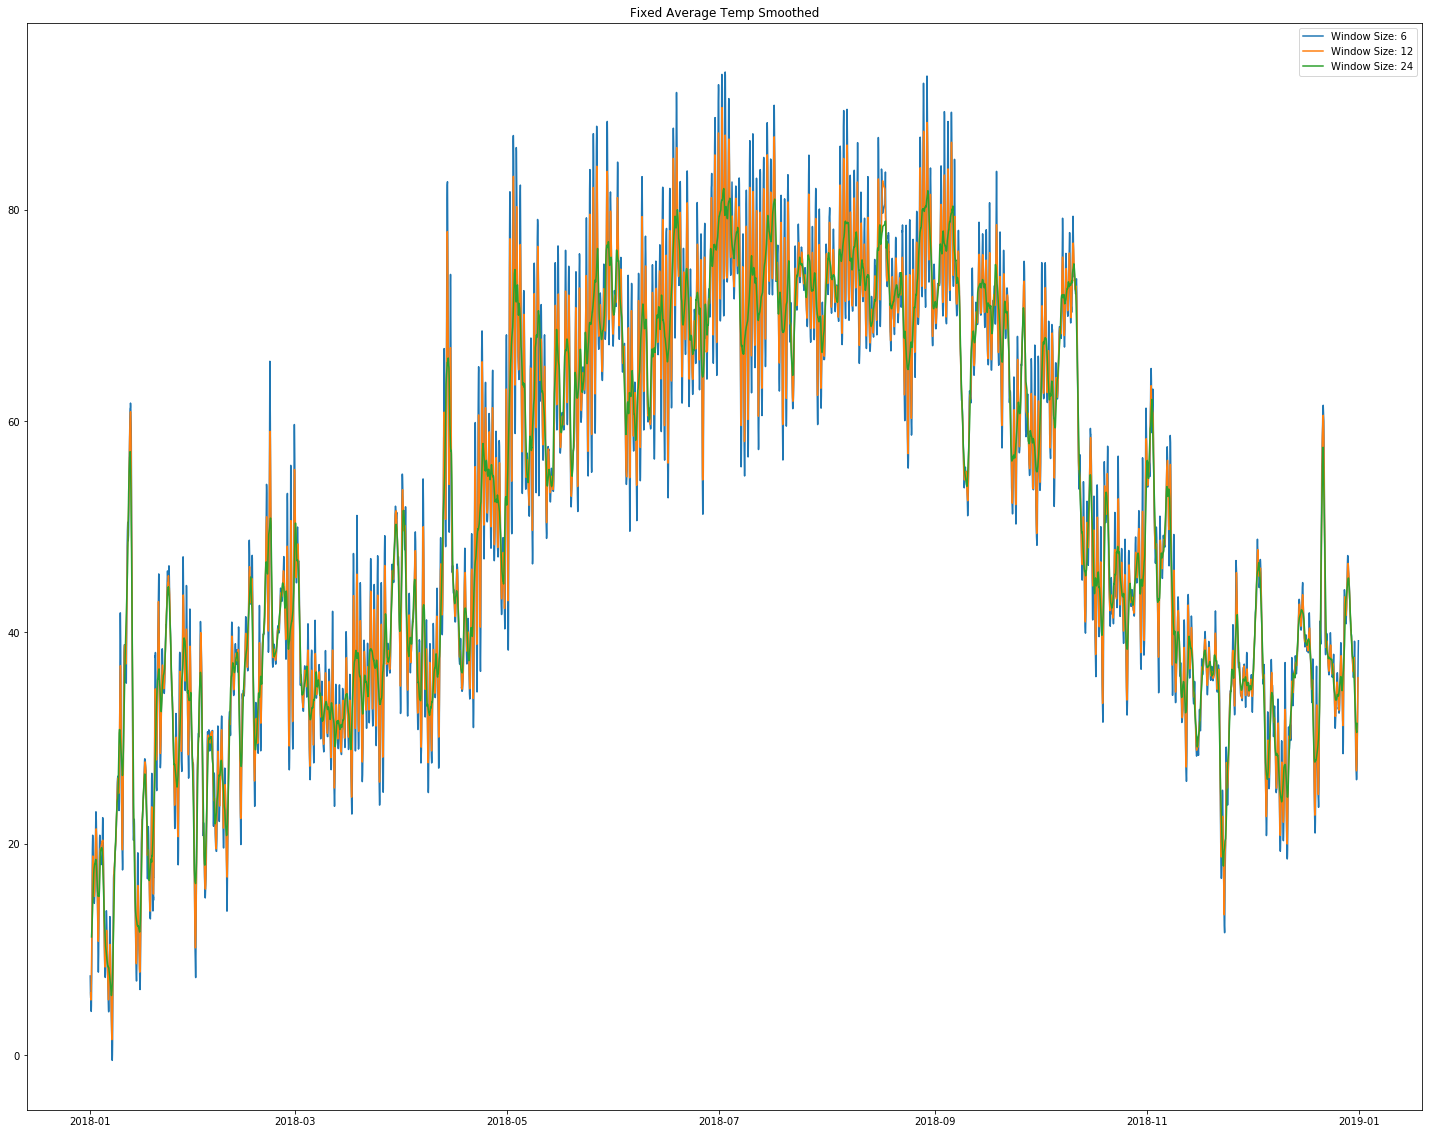

In [20]:
moving_ave_6 = moving_ave(df_kipt["aveTempFixed"], 6)
moving_ave_12 = moving_ave(df_kipt["aveTempFixed"], 12)
moving_ave_24 = moving_ave(df_kipt["aveTempFixed"], 24)

fig = plt.figure(figsize=(25, 20))
ax1 = sns.lineplot(data=moving_ave_6, label = "Window Size: 6")
ax2 = sns.lineplot(data=moving_ave_12, ax=ax1, label = "Window Size: 12")
ax3 = sns.lineplot(data=moving_ave_24, ax=ax1, label = "Window Size: 24")
plt.title("Fixed Average Temp Smoothed")
plt.show()